### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import numpy as np
import urllib.error
from IPython.display import display



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium


In [ ]:
# Función para dar formato estilo moneda al resultado
def format_currency(amount):
    return '${:,.2f}'.format(amount)
# Calcularemos el precio total para cada tienda
    total_tienda1 = tienda['Precio'].sum()
    total_tienda2 = tienda2['Precio'].sum()
    total_tienda3 = tienda3['Precio'].sum()
    total_tienda4 = tienda4['Precio'].sum()



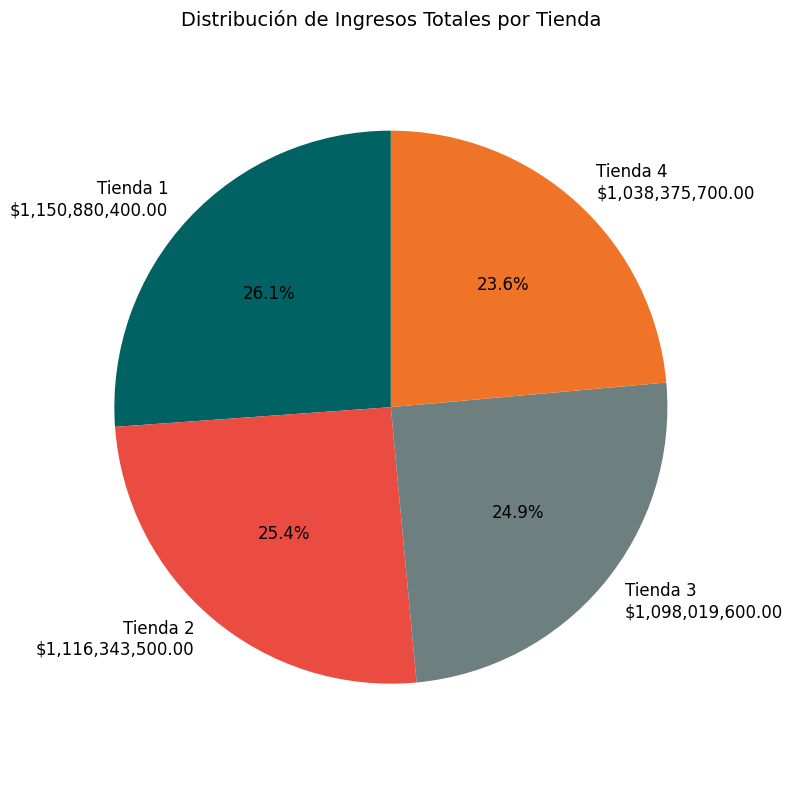

In [ ]:
# Imprimir los resultados
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

# Prepararemos los datos para el gráfico.
totales = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#006262', '#EB4C42', '#6E7F80', '#F07427']  # verde, rojo,metal , naranja

# Verificaremos que haya datos válidos
if sum(totales) <= 0:
    print("Error: No hay datos válidos para generar el gráfico de pastel.")
else:
    # Crearemos el gráfico de pastel
    plt.figure(figsize=(8, 8))
    # Generaremos el gráfico con etiquetas que incluyan el nombre, porcentaje y valor en moneda
    labels = [f"{nombre}\n{format_currency(total)}" for nombre, total in zip(nombres_tiendas, totales)]
    plt.pie(totales, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
    plt.title('Distribución de Ingresos Totales por Tienda', fontsize=14)
    # Haceremos que el gráfico sea circular
    plt.axis('equal')
    # Ajustaremos el diseño
    plt.savefig(f'distribucion_ingresos_por_tienda.png')
    plt.tight_layout()


# 2. Ventas por categoría


Tienda 1 - Ventas por Categoría:
    Categoría del Producto  Cantidad Vendida
0                  Muebles               465
1             Electrónicos               448
2                 Juguetes               324
3        Electrodomésticos               312
4     Deportes y diversión               284
5   Instrumentos musicales               182
6                   Libros               173
7  Artículos para el hogar               171
Categoría con más ventas en Tienda 1: Muebles (465 ventas)

Tienda 2 - Ventas por Categoría:
    Categoría del Producto  Cantidad Vendida
0                  Muebles               442
1             Electrónicos               422
2                 Juguetes               313
3        Electrodomésticos               305
4     Deportes y diversión               275
5   Instrumentos musicales               224
6                   Libros               197
7  Artículos para el hogar               181
Categoría con más ventas en Tienda 2: Muebles (442 ventas)

Tie

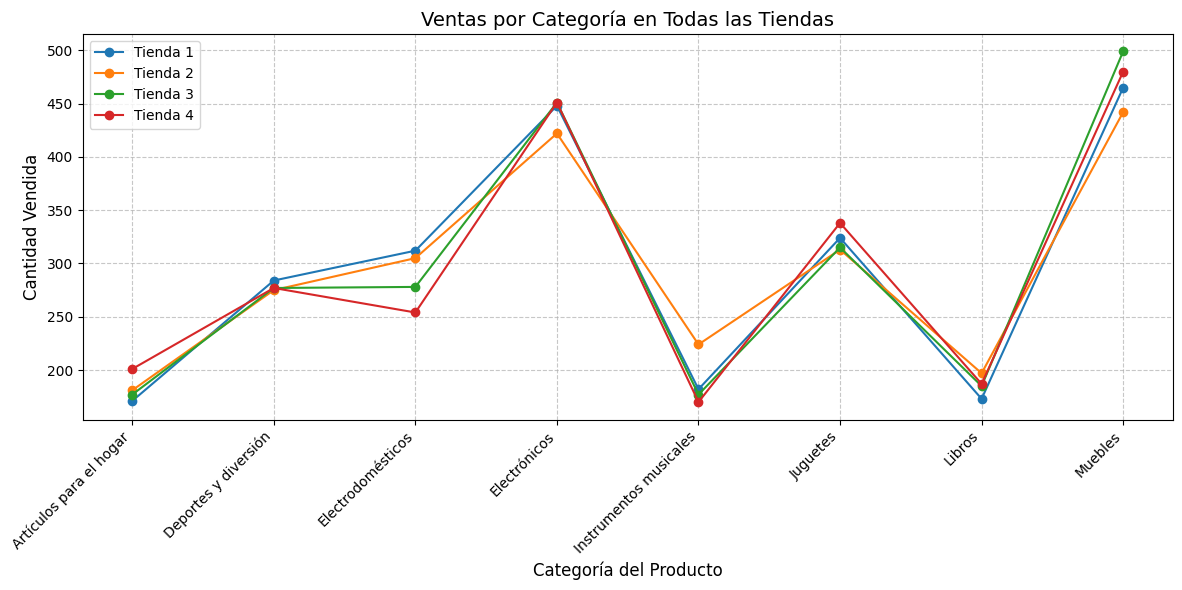

In [ ]:
#Aca crearemos una lista de tiendas con sus datos y nombres
tiendas = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4")
]

#Crearemos nuestra lista para almacenar los datos de ventas por categoría de todas las tiendas
ventas_todas_tiendas = []
categorias_unicas = set()


# Procesaremos cada tienda
for df, nombre_tienda in tiendas:
    # Agruparemos por Categoría nuestro Productos y contar las ventas
    ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenaremos por cantidad vendida de mayor a menor
    ventas_por_categoria = ventas_por_categoria.sort_values(by='Cantidad Vendida', ascending=False)

    # Restableceremos el índice para que sea consecutivo
    ventas_por_categoria = ventas_por_categoria.reset_index(drop=True)

    # Mostraremos los resultados
    print(f"\n{nombre_tienda} - Ventas por Categoría:")
    print(ventas_por_categoria)

    # Ahora imprimiremos la categoría con más ventas
    if not ventas_por_categoria.empty:
        categoria_mas_vendida = ventas_por_categoria.iloc[0]['Categoría del Producto']
        cantidad_mas_vendida = ventas_por_categoria.iloc[0]['Cantidad Vendida']
        print(f"Categoría con más ventas en {nombre_tienda}: {categoria_mas_vendida} ({cantidad_mas_vendida} ventas)")
    else:
        print(f"No hay datos de ventas para {nombre_tienda}")

    # Agregaremos los datos a la lista para el gráfico
    ventas_todas_tiendas.append((nombre_tienda, ventas_por_categoria))

    # Actualizaremos el conjunto de categorías únicas
    categorias_unicas.update(ventas_por_categoria['Categoría del Producto'])

# Convertiremos categorías únicas a una lista ordenada
categorias_unicas = sorted(categorias_unicas)

# Prepararemos los datos para el gráfico de líneas
plt.figure(figsize=(12, 6))
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo

# Graficar una línea por tienda
for (nombre_tienda, ventas_por_categoria), color in zip(ventas_todas_tiendas, colores):
    # Crear un diccionario para mapear categorías a cantidades vendidas
    ventas_dict = dict(zip(ventas_por_categoria['Categoría del Producto'], ventas_por_categoria['Cantidad Vendida']))

    # Crear lista de cantidades vendidas, rellenando con 0 para categorías no presentes
    cantidades = [ventas_dict.get(categoria, 0) for categoria in categorias_unicas]

    # Graficar la línea
    plt.plot(categorias_unicas, cantidades, marker='o', label=nombre_tienda, color=color)

# Configurar el gráfico
plt.title('Ventas por Categoría en Todas las Tiendas', fontsize=14)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(f'ventas_por_categoria.png')
plt.tight_layout()


# 3. Calificación promedio de la tienda


In [ ]:
# Lista para almacenar las calificaciones promedio por tienda (para el gráfico)
calificaciones_promedio = []
nombres_tiendas = []

# Procesaremos cada tienda
for df, nombre_tienda in tiendas:
    # Calcular la calificación promedio
    calificacion_promedio = df['Calificación'].mean()

    # Almacenaremos para el gráfico
    calificaciones_promedio.append(float(calificacion_promedio))
    nombres_tiendas.append(nombre_tienda)

    # Mostraremos la calificación promedio
    print(f"Calificación promedio en {nombre_tienda}: {calificacion_promedio:.2f}")

Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


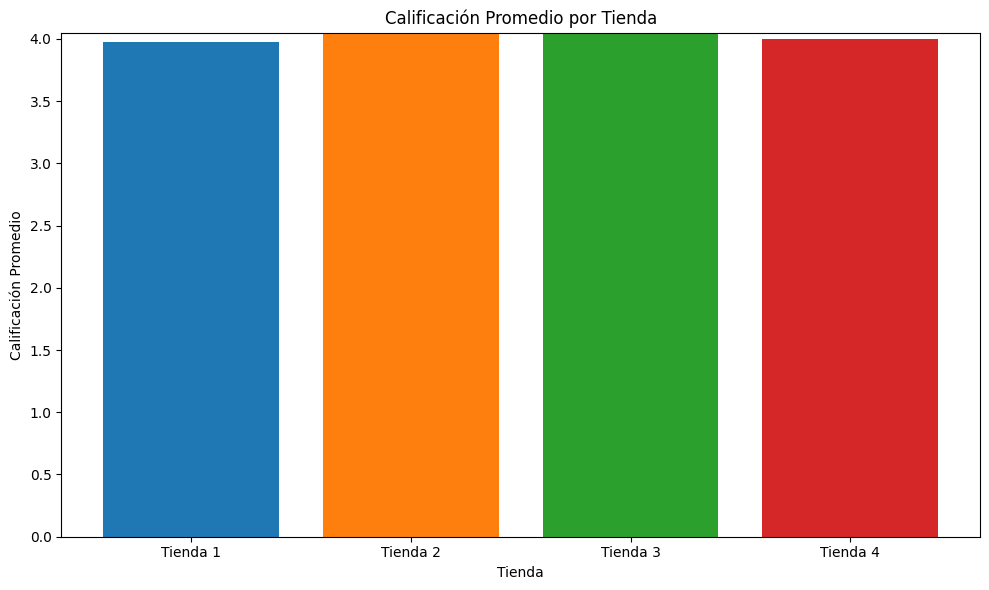

In [ ]:
# Listaremos los colores para cada barra (una por tienda)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo

#Visualizaremos las calificaciones promedio
plt.figure(figsize=(10, 6))
plt.bar(nombres_tiendas, calificaciones_promedio, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

# Ajustar el eje Y dinámicamente según los valores
if calificaciones_promedio and max(calificaciones_promedio) > 0:
    plt.ylim(0, max(calificaciones_promedio) * 1)
else:
    plt.ylim(0, 5)  # Valor por defecto si no hay datos válidos
plt.savefig(f'calificacion_promedio_por_tienda.png')
plt.tight_layout()



# 4. Productos más y menos vendidos


Tienda 1 - Ventas por Producto:
                       Producto  Cantidad Vendida
0                       Armario                60
1                 TV LED UHD 4K                60
2                    Microondas                60
3              Secadora de ropa                58
4                 Mesa de noche                56
5       Bloques de construcción                56
6           Balón de baloncesto                55
7                     Bicicleta                54
8                     Impresora                54
9                  Vaso térmico                54
10                 Refrigerador                54
11                      Batería                53
12                   Cubertería                52
13    Carrito de control remoto                52
14          Modelado predictivo                51
15                  Auriculares                50
16            Ajedrez de madera                49
17                    Iphone 15                49
18               

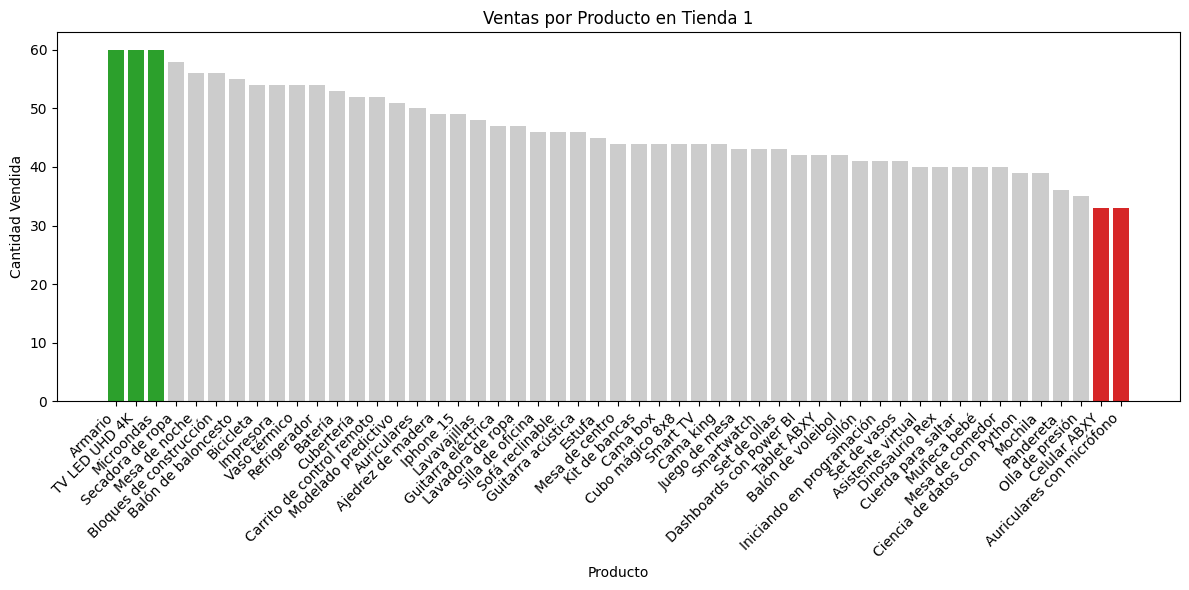

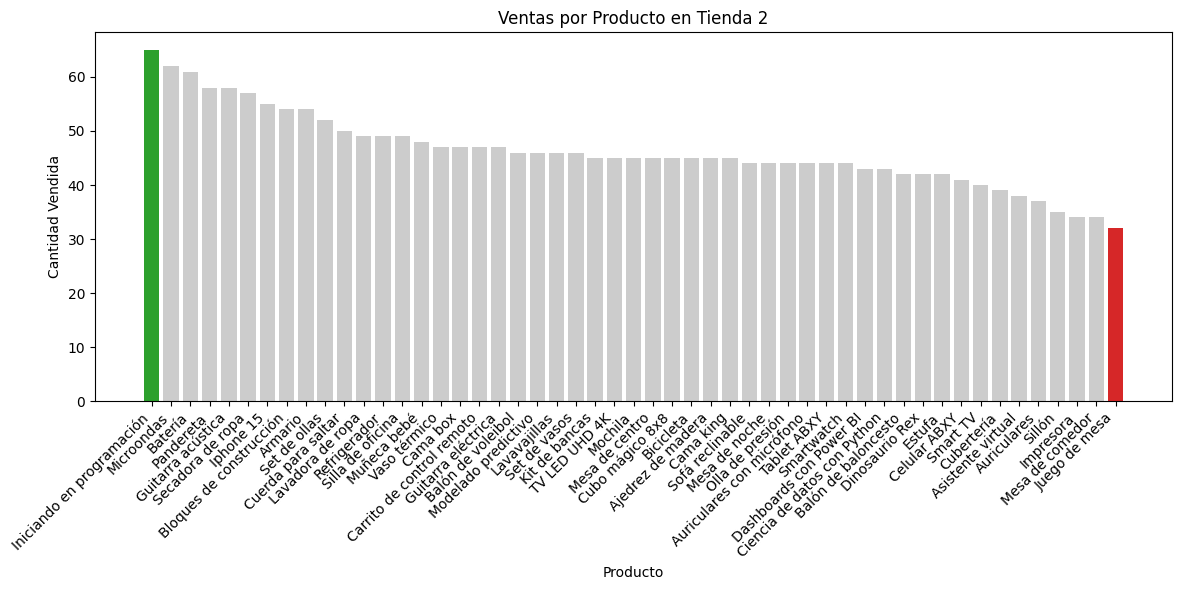

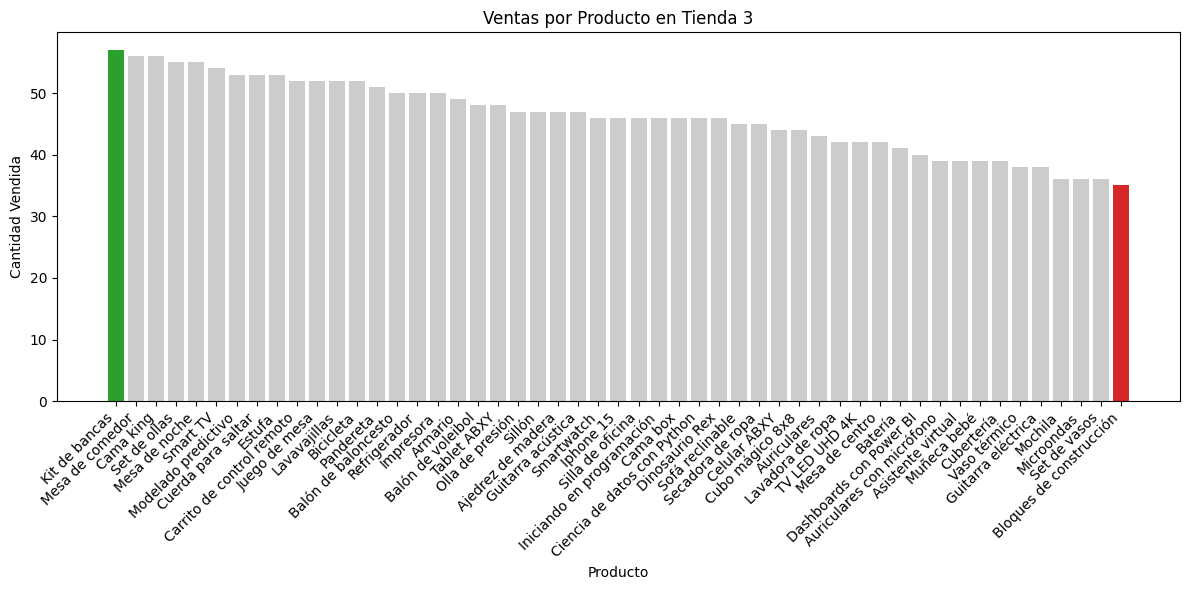

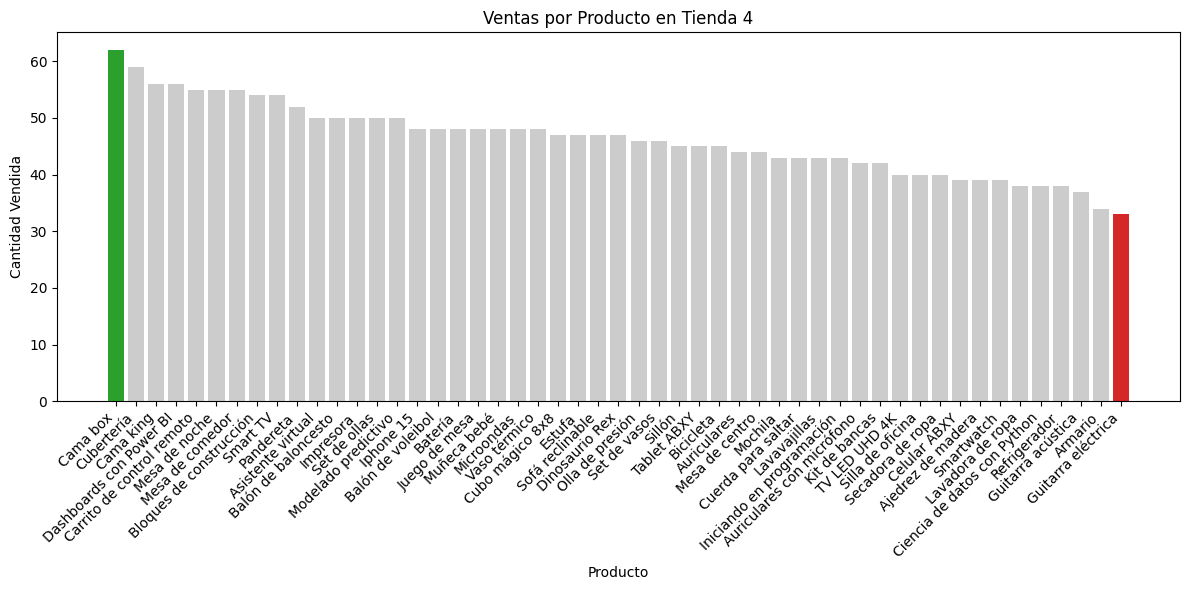

In [ ]:
# Procesaremos por cada tienda
for df, nombre_tienda in tiendas:
    # Agruparemos por Producto y contar las ventas
    ventas_por_producto = df.groupby('Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenaremos por cantidad vendida de mayor a menor
    ventas_por_producto = ventas_por_producto.sort_values(by='Cantidad Vendida', ascending=False)

    # Restableceremos el índice para que sea consecutivo
    ventas_por_producto = ventas_por_producto.reset_index(drop=True)

    # Verificaremos si hay datos
    if ventas_por_producto.empty:
        print(f"\n{nombre_tienda} - No hay datos de ventas disponibles.")
        continue

    # Identificaremos el producto más vendido
    max_ventas = ventas_por_producto['Cantidad Vendida'].max()
    productos_mas_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == max_ventas]['Producto'].tolist()

    # Identificaremos el producto menos vendido
    min_ventas = ventas_por_producto['Cantidad Vendida'].min()
    productos_menos_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == min_ventas]['Producto'].tolist()

    # Mostraremos resultados
    print(f"\n{nombre_tienda} - Ventas por Producto:")
    print(ventas_por_producto)
    print(f"Producto(s) más vendido(s): {', '.join(productos_mas_vendidos)} ({max_ventas} ventas)")
    print(f"Producto(s) menos vendido(s): {', '.join(productos_menos_vendidos)} ({min_ventas} ventas)")

    # Visualizar
    plt.figure(figsize=(12, 6))
    # Crearemos lista de colores: verde para más vendido, rojo para menos vendido, gris para otros
    colores = []
    for _, row in ventas_por_producto.iterrows():
        if row['Producto'] in productos_mas_vendidos:
            colores.append('#cccccc')
        elif row['Producto'] in productos_menos_vendidos:
            colores.append('#d62728')
        else:
            colores.append('#2ca02c')

    plt.bar(ventas_por_producto['Producto'], ventas_por_producto['Cantidad Vendida'], color=colores)
    plt.title(f'Ventas por Producto en {nombre_tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'ventas_{nombre_tienda.replace(" ", "_").lower()}.png')
    plt.tight_layout()

# 5. Envío promedio por tienda

Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


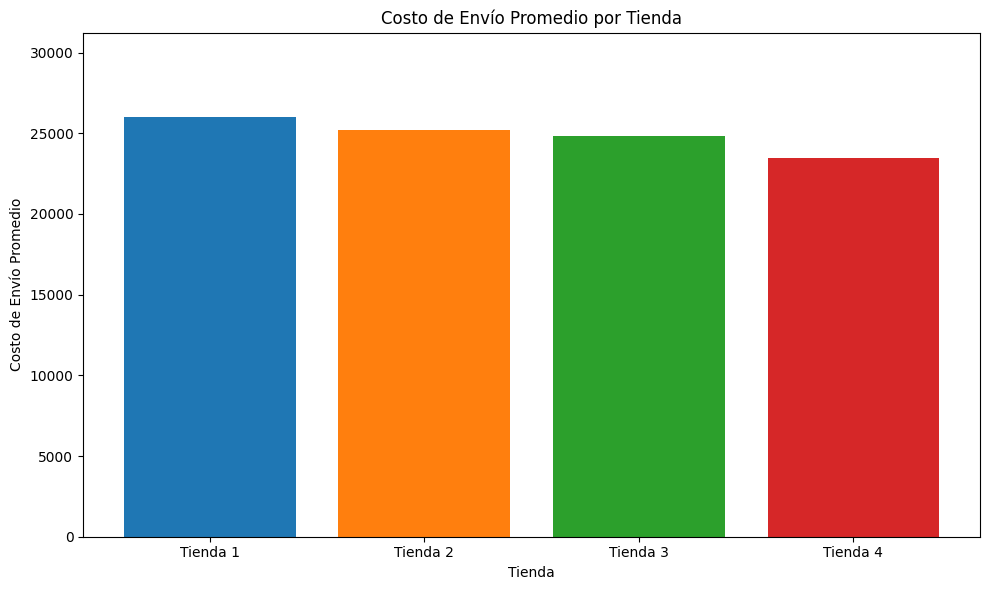

In [ ]:
# Crearemos una lista para almacenar los costos de envío promedio por tienda (para el gráfico)
costos_envio_promedio = []
nombres_tiendas = []

# Procesar cada tienda
for df, nombre_tienda in tiendas:
    try:
        # Verificar que la columna 'Costo de envío' existe
        if 'Costo de envío' not in df.columns:
            print(f"Error: La columna 'Costo de envío' no existe en {nombre_tienda}")
            costos_envio_promedio.append(0)
            nombres_tiendas.append(nombre_tienda)
            continue

        # Convertir la columna 'Costo de envío' a numérico, forzando errores a NaN
        df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

        # Calcular el costo de envío promedio (ignorando NaN)
        costo_envio_promedio = df['Costo de envío'].mean()

        # Manejar caso de datos vacíos o todos NaN
        if pd.isna(costo_envio_promedio):
            print(f"Advertencia: No hay costos de envío válidos en {nombre_tienda}")
            costo_envio_promedio = 0

        # Almacenar para el gráfico
        costos_envio_promedio.append(costo_envio_promedio)
        nombres_tiendas.append(nombre_tienda)

        # Mostrar el costo de envío promedio
        print(f"Costo de envío promedio en {nombre_tienda}: {format_currency(costo_envio_promedio)}")

    except Exception as e:
        print(f"Error al procesar {nombre_tienda}: {e}")
        costos_envio_promedio.append(0)
        nombres_tiendas.append(nombre_tienda)


# Visualizaremos los costos de envío promedio
plt.figure(figsize=(10, 6))
# Lista de colores para cada barra (una por tienda)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo
plt.bar(nombres_tiendas, costos_envio_promedio, color=colores)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
# Ajustaremos el eje "y" dinámicamente según los valores
if costos_envio_promedio and max(costos_envio_promedio) > 0:
    plt.ylim(0, max(costos_envio_promedio) * 1.2)  # Añade un 20% extra para visibilidad
else:
    plt.ylim(0, 10)  # Valor por defecto si no hay datos válidos
plt.savefig(f'costo_de_envio_promedio_por_tienda.png')
plt.tight_layout()



# Informes de la evaluación




Recomendación para el Sr. João: Venta de la Tienda 4

Tras analizar los datos de desempeño de las cuatro tiendas, se recomienda al Sr. João considerar la venta de la Tienda 4.

**Principales razones:**

- **Baja facturación:** La Tienda 4 registra el menor nivel de ventas entre todas las tiendas analizadas, lo que refleja un bajo potencial de ingresos y un rendimiento económico poco favorable.

- **Calificación de clientes por debajo del promedio:** Esta tienda presenta la segunda calificación más baja, lo cual indica una menor satisfacción del cliente. Una percepción negativa por parte de los consumidores puede dañar la reputación del negocio y reducir aún más su capacidad para atraer nuevos compradores.

- **Costo de envío reducido, pero insuficiente:** Aunque la Tienda 4 ofrece el costo de envío más bajo, este factor no compensa sus debilidades en términos de ventas y satisfacción del cliente.

**Conclusión:**

La Tienda 4 muestra el desempeño más débil entre las cuatro evaluadas. Su bajo volumen de ventas, la baja calificación de los clientes y un ahorro en costos logísticos que no genera un impacto significativo, hacen de esta tienda una candidata lógica para su venta. Al desprenderse de este activo, el Sr. João podrá enfocar sus recursos en las tiendas con mejor desempeño y así optimizar sus resultados comerciales.


Atte.:
Jose Valdez